In [227]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

# Variável Contínua - valores de salário

## classes (intervalos) e delimitadores de intervalos

In [230]:
# o length do intervals tem que ser 1 a mais que da tabela para não dar list index out of range
classes = []
intervals = []
for i in range(4, 21, 4):
    string = f'{i} - {i + 4}'
    classes.append(string)
for j in range(4, 25, 4):
    intervals.append(j)
print(f'classes: {classes}, intervals: {intervals}')

classes: ['4 - 8', '8 - 12', '12 - 16', '16 - 20', '20 - 24'], intervals: [4, 8, 12, 16, 20, 24]


## criando dataframe com instâncias classificadas por categorias numéricas (intervalos)

In [232]:
table = []
for i in range(10):
    table.append('4-8')
for i in range(12):
    table.append('8-12')
for i in range(8):
    table.append('12-16')
for i in range(5):
    table.append('16-20')
for i in range(1):
    table.append('20-24')
df2 = pd.DataFrame({'Classes de salários': table})
df2

,Classes de salários
0,4-8
1,4-8
2,4-8
3,4-8
4,4-8
5,4-8
6,4-8
7,4-8
8,4-8
9,4-8


### resumo por cálculo de frequência

In [234]:
summ = df2.groupby('Classes de salários').size().reset_index()
summ.rename(columns={0: 'Frequência'}, inplace=True)
summ

,Classes de salários,Frequência
0,12-16,8
1,16-20,5
2,20-24,1
3,4-8,10
4,8-12,12


## criando dataframe sem instâncias individuais, tabela já resumida por proporção (frequência, porcentagem)

In [236]:
# valores de frequência dados
freq = [10, 12, 8, 5, 1]
n = sum(freq)

# list comprehension
porc = [round(f/n*100, 2) for f in freq]

# dict comprehension
full_list = [classes, freq, porc]
colunas = ['Classes de salários', 'Frequência', 'Porcentagem']
data = {colunas[i]: full_list[i] for i in range(len(colunas))}

In [237]:
df = pd.DataFrame(data)
df

,Classes de salários,Frequência,Porcentagem
0,4 - 8,10,27.78
1,8 - 12,12,33.33
2,12 - 16,8,22.22
3,16 - 20,5,13.89
4,20 - 24,1,2.78


## Univariate analysis

### gráfico de barras - representação discreta (classes)

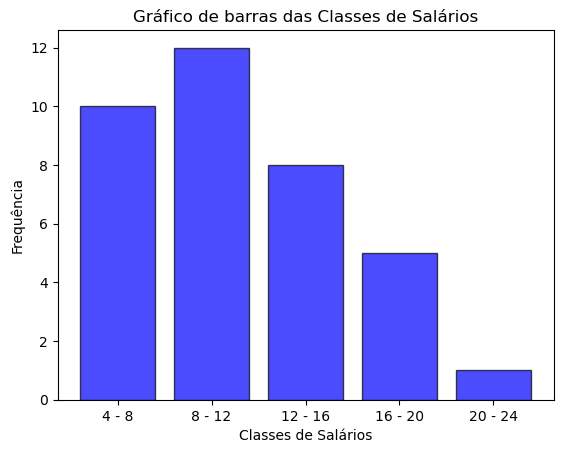

In [240]:
## Matplotlib
plt.bar(df['Classes de salários'], df['Frequência'], color='blue', alpha=0.7, edgecolor='black')
plt.title("Gráfico de barras das Classes de Salários")
plt.xlabel("Classes de Salários")
plt.ylabel("Frequência")

# Exibindo
plt.show()

In [241]:
## plotly
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(x=df['Classes de salários'], y=df['Frequência'], marker=dict(color='blue', opacity=0.7))])
fig.update_layout(
    title="Gráfico de barras das Classes de Salários",
    xaxis_title="Classes de salários",
    yaxis_title="Frequência",
    xaxis=dict(tickmode='array', tickvals=df['Classes de salários'])
    #template='plotly_dark'  # Um tema para melhorar a aparência
)

### histograma - representação contínua (valores)

<Axes: xlabel='Classes de salários', ylabel='Count'>

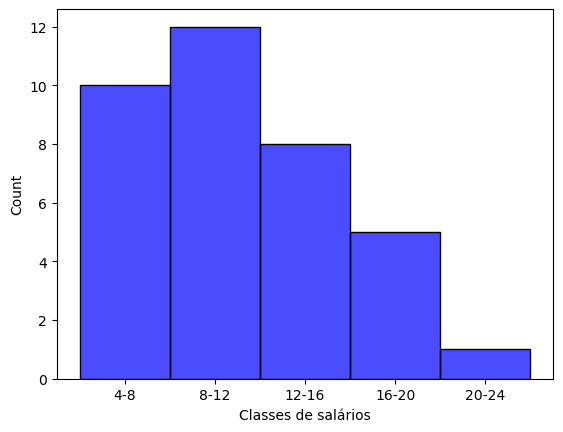

In [243]:
sns.histplot(df2['Classes de salários'], bins=30, kde=False, color='blue', alpha=0.7, edgecolor='black')
# em tese isto não é um histograma, pois os valores das bases não estão em escala no eixo x

In [244]:
# Cálculo da densidade de frequência
densidade = [round(f / (n * (intervals[i+1] - intervals[i])), 4) for i, f in enumerate(freq)] # enumerate permite iterar por índice e valor
df['densidade de frequência'] = densidade
df

,Classes de salários,Frequência,Porcentagem,densidade de frequência
0,4 - 8,10,27.78,0.0694
1,8 - 12,12,33.33,0.0833
2,12 - 16,8,22.22,0.0556
3,16 - 20,5,13.89,0.0347
4,20 - 24,1,2.78,0.0069


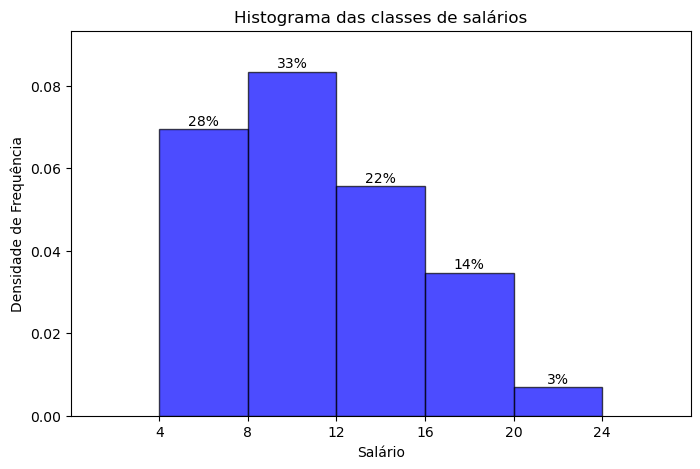

In [245]:
# matplotlib
plt.figure(figsize=(8, 5))
plt.bar(intervals[:-1], densidade, width=4, align='edge', edgecolor='black', color='blue', alpha=0.7)
# plt.bar(midpoints[:-1]), densidade, width=4, align='center', edgecolor='black', color='blue', alpha=0.7)
# muda o referencial da barra, mas é equivalente. Na primeira opção ele pega os valores de início,
# na segunda pega os valores do centro da barra
plt.xlabel('Salário')
plt.ylabel('Densidade de Frequência')
plt.title('Histograma das classes de salários')
plt.xticks(intervals)
plt.ylim(0, max(densidade) + 0.01)
plt.xlim(0, intervals[-1] + 4)

for i, p in enumerate(porc):
    plt.text(intervals[i] + 2, densidade[i] + 0.001, f'{round(p)}%', ha='center', fontsize=10)
    # especifica a posição do texto: meio do intervalo no eixo x, um pouco acima da linha do eixo y para não sobrepor a barra
plt.show()


In [246]:
midpoints = [intervals[i] + 2 for i in range(len(intervals))]

# plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=midpoints[:-1], # escolher qual é tomado como referência para o centro da barra
    y=densidade,
    marker=dict(color='blue', opacity=0.7),
    width=[intervals[i + 1] - intervals[i] for i in range(len(intervals) - 1)],
    # marker= {'color': 'blue', 'opacity': '0.7'} 'equivalente
    text=[f'{round(p)}%' for p in porc],  # especifica o texto criando a lista na hora
    textposition='outside'
))

fig.update_layout(
    title='Histograma das classes de salários',
    xaxis=dict(
        title='Salário',
        tickvals=intervals, # Define os valores dos ticks no eixo X
        range=[0, intervals[-1] + 3]  # Garantir que o eixo cubra todos os intervalos
        # ticktext=[f'{intervals[i]}-{intervals[i + 1]}' for i in range(len(intervals) - 1)] 
    ),
    yaxis=dict(
        title='Densidade de Frequência',
        range=[0, max(densidade) + 0.02]  # Define o intervalo do eixo Y
    ),
    bargap=0.2,
)

fig.show()


# Variável Discreta - número de filhos

## criando dataframe já resumido por proporção

In [249]:
# valores de frequência dados
filhos = [0, 1, 2, 3, 4, 5]
freq2 = [4, 5, 7, 3, 0, 1]
n2 = sum(freq2)
porc2 = [round(f/n2*100, 2) for f in freq2]
list_comp2 = [filhos, freq2, porc2]
colunas2 = ['num filhos', 'frequência', 'porcentagem']
dt2 = {colunas2[i]: list_comp2[i] for i in range(len(colunas2))}
dt = pd.DataFrame(dt2)
dt

,num filhos,frequência,porcentagem
0,0,4,20.0
1,1,5,25.0
2,2,7,35.0
3,3,3,15.0
4,4,0,0.0
5,5,1,5.0


## Univariate analysis

### gráfico de barras

Text(0, 0.5, 'frequência')

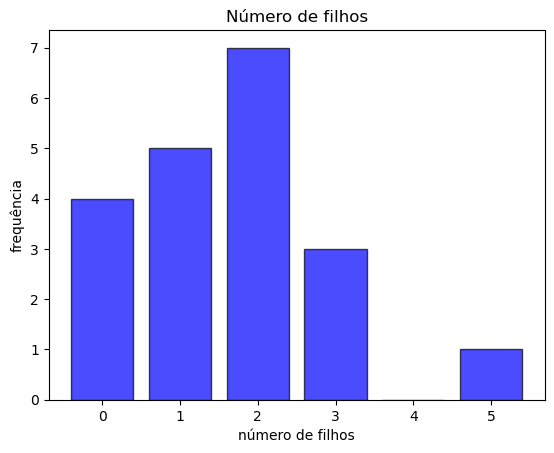

In [252]:
# representação de valores discretos
plt.bar(dt['num filhos'], dt['frequência'], color='blue', alpha=0.7, edgecolor='black')
plt.title('Número de filhos')
plt.xlabel('número de filhos')
plt.ylabel('frequência')

Text(0, 0.5, 'porcentagem')

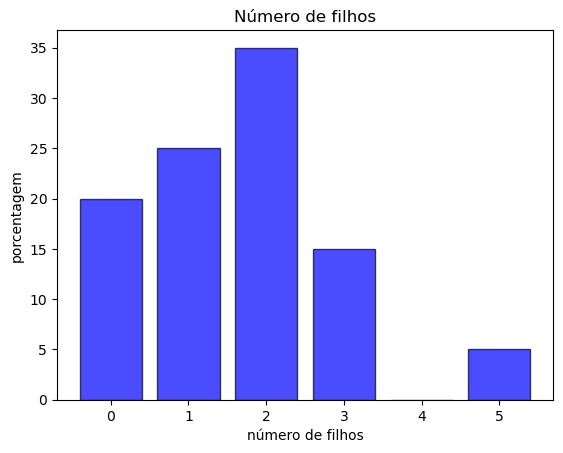

In [253]:
plt.bar(dt['num filhos'], dt['porcentagem'], color='blue', alpha=0.7, edgecolor='black')
plt.title('Número de filhos')
plt.xlabel('número de filhos')
plt.ylabel('porcentagem')

### histograma

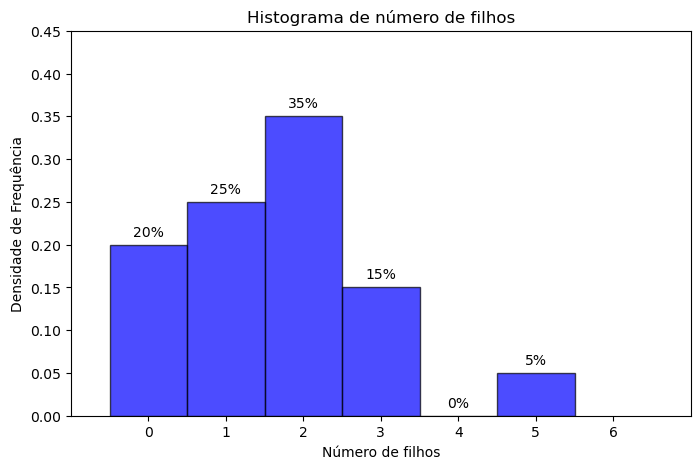

In [255]:
intervals2 = [0, 1, 2, 3, 4, 5, 6]
densidade2 = [round(f / (n2 * (intervals2[i + 1] - intervals2[i])), 4) for i, f in enumerate(freq2)]
dt['densidade'] = densidade2
midpoints2 = [intervals2[i] + (intervals2[i+1] - intervals2[i]) / 2 for i in range(len(freq2))]

# representação de valores contínuos
plt.figure(figsize=(8, 5))
plt.bar(intervals2[:-1], densidade2, align='center',
        width=[intervals2[i+1] - intervals2[i] for i in range(len(intervals2) - 1)],
        color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Número de filhos')
plt.ylabel('Densidade de Frequência')
plt.title('Histograma de número de filhos')
plt.xticks(intervals2)
plt.ylim(0, max(densidade2) + 0.1)
plt.xlim(0 -1 , intervals2[-1] + 1)

for i, p in enumerate(porc2):
    plt.text(intervals2[i], densidade2[i] + 0.01, f'{round(p)}%', ha='center', fontsize=10)
plt.show()

In [256]:
# plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=intervals2[:-1],
    y=densidade2,
    marker=dict(color='blue', opacity=0.7),
    width=[intervals2[i+1] - intervals2[i] for i in range(len(freq2))],
    text=[f'{round(p)}%' for p in porc2],
    textposition='outside'
))

fig.update_layout(
    title='Histograma do número de filhos',
    xaxis=dict(
        title='Número de filhos',
        tickvals=intervals2[:-1],
        range=[-1, intervals2[-1] + 1]
    ),
    yaxis=dict(
        title='Densidade de Frequência',
        range=[0, max(densidade2) + 0.15]  # Define o intervalo do eixo Y
    ),
    bargap=0.2,
)

fig.show()

# Agrupamento em classes - notas de prova

## criando dataframe com observações individuais

In [259]:
notas = [
    3.5, 6.5, 5.5, 6.5, 4.0, 3.5, 6.0, 5.0, 2.5, 4.5, 7.0, 6.0, 5.0, 5.5, 3.5, 5.5, 
    6.5, 4.0, 4.5, 5.0, 4.0, 5.5, 7.0, 6.5, 5.0, 5.5, 3.5, 6.0, 6.0, 4.5, 4.0, 6.5, 
    4.0, 4.5, 6.5, 6.0, 5.0, 6.5, 4.0, 3.5, 6.0, 5.5, 4.5, 6.5, 3.5, 6.0, 5.5, 7.0, 
    4.5, 6.5, 4.5, 7.5, 7.0, 7.0, 8.0, 7.0, 4.5, 7.0, 4.5, 7.5, 5.0, 7.0, 6.5, 6.0, 
    7.0, 6.5, 6.0, 4.5, 7.5, 6.5, 4.5, 6.5, 5.0, 7.0, 6.0, 7.0, 6.5, 5.0, 5.5, 6.5, 
    5.0, 6.0, 6.5, 5.5, 5.0, 4.0, 7.0, 6.5, 7.0, 8.0, 6.5, 7.5, 7.0, 6.5, 8.0, 7.5, 
    7.0, 5.0, 7.5, 7.5, 10.0
]
dt3 = pd.DataFrame({'Notas': notas})
dt3

,Notas
0,3.5
1,6.5
2,5.5
3,6.5
4,4.0
...,...
96,7.0
97,5.0
98,7.5
99,7.5


## criando classes

In [261]:
classes2 = [f'{i} - {i+1}' for i in range(11)]
freq3 = [0]*11
intervals3 = [int(item.split(' - ')[0]) for item in classes2]
intervals3.append(intervals3[-1] + 1)
classes2

['0 - 1',
 '1 - 2',
 '2 - 3',
 '3 - 4',
 '4 - 5',
 '5 - 6',
 '6 - 7',
 '7 - 8',
 '8 - 9',
 '9 - 10',
 '10 - 11']

## diagrama ramo-e-folhas

In [263]:
ramo_folha = {int(item.split(' - ')[0]): [] for item in classes2}
for nota in notas:
    for i, item in enumerate(classes2):
        ramo = int(item.split(' - ')[0])
        if ramo <= nota < ramo + 1:
            folha = int((nota % 1)*10)
            ramo_folha[ramo].append(folha)
            freq3[i] = freq3[i] + 1
            break
print('\nDiagrama ramo-e-folhas\n')
for ramo in sorted(ramo_folha.keys()):
    folhas = ''.join(map(str, ramo_folha[ramo]))
    print(f'{ramo} | {folhas}')
print('\n')


Diagrama ramo-e-folhas

0 | 
1 | 
2 | 5
3 | 555555
4 | 050505005055555550
5 | 50055050505500050500
6 | 550055005505050550505505505555
7 | 0005000050050000505055
8 | 000
9 | 
10 | 0




## dataframe com proporções

In [265]:
classes2 = [f'{i} - {i+1}' for i in range(10)]
freq3 = [0]*10
intervals3 = [int(item.split(' - ')[0]) for item in classes2]
intervals3.append(intervals3[-1] + 1)
classes2

['0 - 1',
 '1 - 2',
 '2 - 3',
 '3 - 4',
 '4 - 5',
 '5 - 6',
 '6 - 7',
 '7 - 8',
 '8 - 9',
 '9 - 10']

In [266]:
for nota in notas:
    for i, item in enumerate(classes2):
        begg = int(item.split(' - ')[0])
        end = int(item.split(' - ')[1])
        if nota == 0:
            freq3[0] = freq3[0] + 1
            break
        if (begg < nota <= end):
            freq3[i] = freq3[i] + 1
            break
freq3

[0, 0, 1, 13, 22, 20, 34, 10, 0, 1]

In [267]:
colunas = ['Notas', 'Frequência', 'Porcentagem', 'Densidade']
n3 = sum(freq3)
densidade3 = [round(f / (n * (intervals3[i+1] - intervals3[i])), 4) for i, f in enumerate(freq3)]
porc3 = [round(f/n3*100, 2) for f in freq3]
full_list3 = [classes2, freq3, porc3, densidade3]
df3 = {colunas[i]: full_list3[i] for i in range(len(full_list3))}
df3 = pd.DataFrame(df3)
df3

,Notas,Frequência,Porcentagem,Densidade
0,0 - 1,0,0.00,0.0000
1,1 - 2,0,0.00,0.0000
2,2 - 3,1,0.99,0.0278
3,3 - 4,13,12.87,0.3611
4,4 - 5,22,21.78,0.6111
5,5 - 6,20,19.80,0.5556
6,6 - 7,34,33.66,0.9444
7,7 - 8,10,9.90,0.2778
8,8 - 9,0,0.00,0.0000
9,9 - 10,1,0.99,0.0278


## histograma

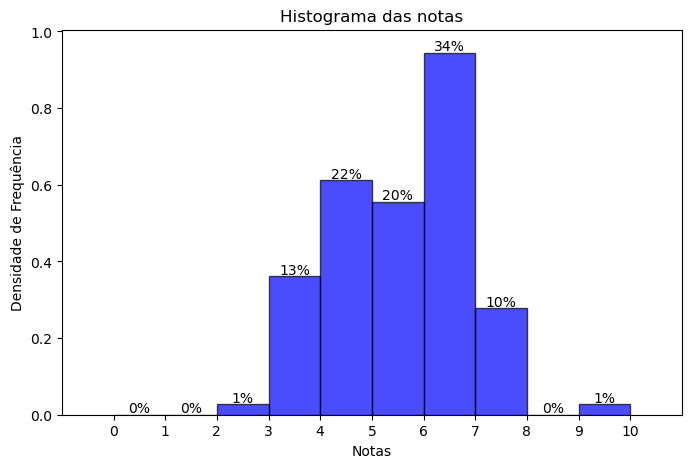

In [269]:
# matplotlib
plt.figure(figsize=(8, 5))
plt.bar(intervals3[:-1], densidade3, align='edge',
        width = [intervals3[i+1] - intervals3[i] for i in range(len(intervals3) - 1)],
        edgecolor='black', color='blue', alpha=0.7)
plt.xlabel('Notas')
plt.ylabel('Densidade de Frequência')
plt.title('Histograma das notas')
plt.xticks(intervals3)
plt.ylim(0, max(densidade3) + 0.06)
plt.xlim(-1, intervals3[-1] + 1)

for i, p in enumerate(porc3):
    plt.text(intervals3[i] + (intervals3[i+1] - intervals3[i])/2, densidade3[i] + 0.005, f'{round(p)}%', ha='center', fontsize=10)
plt.show()


In [270]:
# plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=intervals3[:-1],
    y=densidade3,
    marker=dict(color='blue', opacity=0.7),
    width=[intervals3[i+1] - intervals3[i] for i in range(len(freq3))],
    text=[f'{round(p)}%' for p in porc3],
    textposition='outside'
))

fig.update_layout(
    title='Histograma das notas',
    xaxis=dict(
        title='Notas',
        tickvals=intervals3[:-1],
        range=[-1, intervals3[-1] + 1]
    ),
    yaxis=dict(
        title='Densidade de Frequência',
        range=[0, max(densidade3) + 0.1]  # Define o intervalo do eixo Y
    ),
    bargap=0.2,
)

fig.show()

## gráfico de dispersão de uma variável

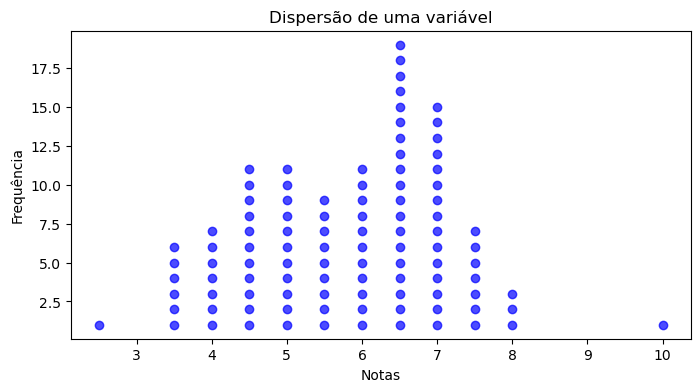

In [272]:
# é o mesmo que aumentarmos o número de classes de um histograma para o número de instâncias
count = {}
x = notas
y = []
for nota in notas:
    if nota not in count.keys():
        count[nota] = 0
    count[nota] += 1
    y.append(count[nota])
plt.figure(figsize=(8, 4))
plt.scatter(x, y, color='blue', alpha=0.7)

plt.xlabel("Notas")
plt.ylabel("Frequência")
plt.title("Dispersão de uma variável")

# Exibir o gráfico
plt.show()

# Histogramas por variável quantitativa de um dataframe

In [274]:
dexample = pd.read_csv('housing.csv')

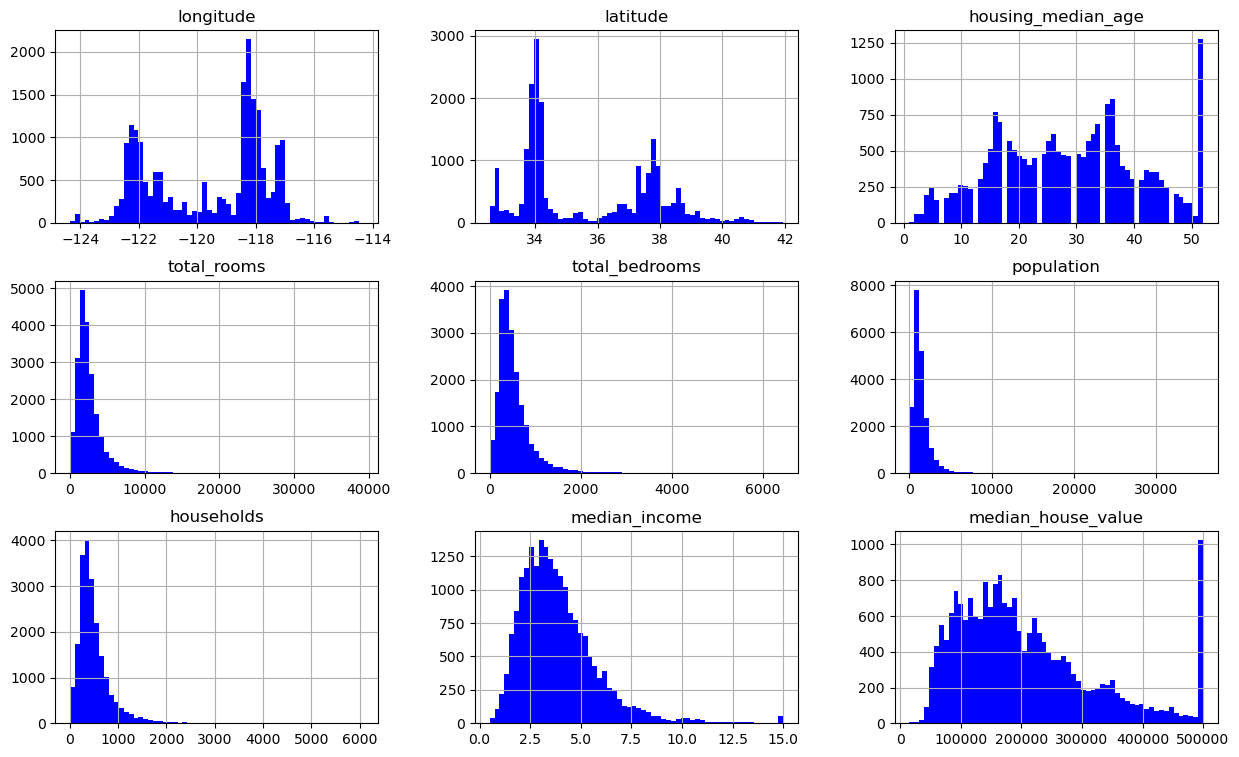

In [275]:
dexample.hist(bins=60, figsize=(15,9),color='blue')
plt.show()